<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/Clasificacion_Imagenes_Futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##IMPORTAMOS LAS LIBRERIAS NECESARIAS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten, Dense, Reshape,Conv2D,MaxPooling2D,Conv2DTranspose
from tensorflow.keras.models import Sequential
import os

## Cargando los datos
- Acá cada imagen tiene un tamaño de 28x28, lo que significa una entrada de 784

In [3]:
##CONECTAMOS CON GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DESCOMPRIMIMOS LAS CARPETAS QUE CONTIENEN LOS ARCHIVOS. EN ESTE CASO TENEMOS UN FOLDER POR CATEGORIA
!unzip '/content/drive/MyDrive/Especializacion BigData EIA/AnaliticadeDatosBIBD/DatasetsAnalytics/CristianoRonaldo.zip'

In [ ]:
!unzip '/content/drive/MyDrive/Especializacion BigData EIA/AnaliticadeDatosBIBD/DatasetsAnalytics/LionelMessi.zip'

In [68]:
##Do not run this! THIS WILL DELETE THE UNZIPED FOLDER 
import shutil
shutil.rmtree("/content/train")

In [ ]:
x = 0
for filename in os.listdir('/content/LionelMessi'):
  print(filename)
  x += 1

print(x)

In [6]:
import os
path_messi = '/content/LionelMessi'
path_cr7 = '/content/CristianoRonaldo'

In [7]:
#ESTO NOS PERMITE GENERAR UN LABEL A LOS ARCHIVOS DENTRO DE CADA CARPETA
x = 0
for i in os.listdir(path_messi):
  file_oldname = os.path.join(path_messi, i)
  file_newname_newfile = os.path.join(path_messi, f'messi_{x}.jpg')
  os.rename(file_oldname, file_newname_newfile)
  x = x + 1

In [8]:
x = 0
for i in os.listdir(path_cr7):
  file_oldname = os.path.join(path_cr7, i)
  file_newname_newfile = os.path.join(path_cr7, f'cr7_{x}.jpg')
  os.rename(file_oldname, file_newname_newfile)
  x += 1

In [9]:
##CREAMOS listas USANDO LA FUNCIÓN glob con los path names de los archivos
import glob
cr7= glob.glob("/content/CristianoRonaldo/*.jpg")
the_goat= glob.glob("/content/LionelMessi/*.jpg")

In [ ]:
cr7

In [15]:
len(cr7)

2419

In [16]:
len(the_goat)

2307

In [ ]:
x = 0
for i in the_goat:
  if 'messi_2' in i:
    var = i
  x = x + 1

In [ ]:
var

'/content/LionelMessi/messi_2039.jpg'

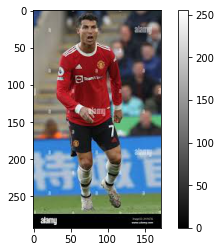

In [10]:
img = plt.imread(cr7[0])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [18]:
img.shape

(675, 1200, 3)

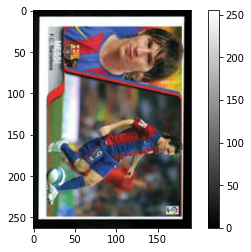

In [11]:
img = plt.imread(the_goat[1525])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [20]:
img.shape

(168, 300, 3)

In [21]:
len(cr7)

2419

##creamos una lista con la ruta de las imagenes para cargar los datos de entrenamiento. Luego lo convertimos en un array

In [12]:
import random
train = (the_goat[0:1800] + cr7[0:1800])
##random.shuffle(train)

In [13]:
fnames_train = np.array(train)

In [113]:
fnames_train

array(['/content/LionelMessi/messi_1459.jpg',
       '/content/LionelMessi/messi_1296.jpg',
       '/content/LionelMessi/messi_7.jpg', ...,
       '/content/CristianoRonaldo/cr7_3466.jpg',
       '/content/CristianoRonaldo/cr7_3432.jpg',
       '/content/CristianoRonaldo/cr7_2951.jpg'], dtype='<U38')

In [14]:
labels_train = np.array([(0 if 'messi' in fname else 1) for fname in fnames_train])

In [15]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([1800, 1800]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cristianos y Messias')

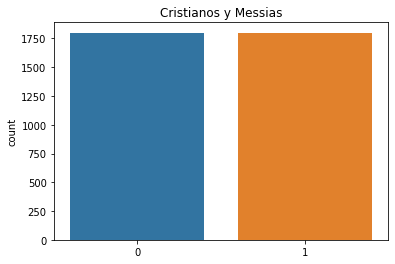

In [28]:
import seaborn as sns
sns.countplot(labels_train)
plt.title('Cristianos y Messias')

##CARGAMOS LOS DATOS PARA PRUEBAS

In [16]:
test = (the_goat[1801:] + cr7[1801:])
random.shuffle(test)

In [17]:
fnames_test = np.array(test)
labels_test = np.array([(0 if 'messi' in fname else 1) for fname in fnames_test])

In [18]:
np.unique(labels_test,return_counts=True)

(array([0, 1]), array([2340, 2563]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cristianos y Messias')

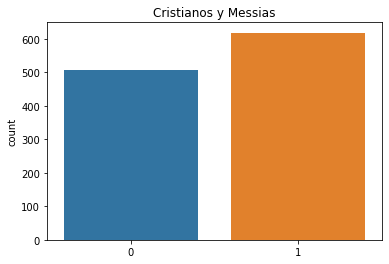

In [32]:
import seaborn as sns
sns.countplot(labels_test)
plt.title('Cristianos y Messias')

In [33]:
#Esta función lee una imagen, y la devuelve convertida al tamaño que requerimos (64x64). Que es el shape que definimos en la red neuronal de arriba (input_shape)
def read_image(file_path, ROWS = 28,COLS = 28):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS))

In [34]:
#Ahora, esta función convierte todas las imagenes, utilizando la función anterior. Entonces esta función hace un ciclo, leyendo cada imagen y convirtiendola
def prep_data(images, ROWS = 28,COLS = 28,CHANNELS=3):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS))
  for i, image_file in enumerate(images):
    image = read_image(image_file,ROWS,COLS)
    data[i] = image   
  return data

In [35]:
import cv2
ROWS = 128
COLS = 128
CHANNELS = 3
train = prep_data(fnames_train,ROWS=ROWS,COLS=COLS)

In [36]:
ROWS = 128
COLS = 128
CHANNELS = 3
test = prep_data(fnames_test,ROWS=ROWS,COLS=COLS)

In [37]:
train.shape

(3600, 128, 128, 3)

In [38]:
test.shape

(1124, 128, 128, 3)

In [39]:
# Normalizar los datos
x_train = train.astype('float32')/255.
x_test = test.astype('float32')/255.

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [42]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train,labels_train, test_size=0.2, random_state=7)

In [44]:
history=classifier.fit(X_train,Y_train, epochs = 50,validation_data=(X_val,Y_val))

Epoch 1/50
90/90 [==============================] - 54s 592ms/step - loss: 0.5770 - accuracy: 0.7170 - val_loss: 0.5017 - val_accuracy: 0.7708
Epoch 2/50
90/90 [==============================] - 51s 567ms/step - loss: 0.4156 - accuracy: 0.8226 - val_loss: 0.4263 - val_accuracy: 0.8167
Epoch 3/50
90/90 [==============================] - 51s 570ms/step - loss: 0.3226 - accuracy: 0.8622 - val_loss: 0.4231 - val_accuracy: 0.8111
Epoch 4/50
90/90 [==============================] - 51s 570ms/step - loss: 0.2561 - accuracy: 0.8969 - val_loss: 0.4753 - val_accuracy: 0.8264
Epoch 5/50
90/90 [==============================] - 51s 569ms/step - loss: 0.1574 - accuracy: 0.9389 - val_loss: 0.5244 - val_accuracy: 0.7958
Epoch 6/50
90/90 [==============================] - 51s 571ms/step - loss: 0.0833 - accuracy: 0.9726 - val_loss: 0.5322 - val_accuracy: 0.8139
Epoch 7/50
90/90 [==============================] - 52s 578ms/step - loss: 0.0449 - accuracy: 0.9878 - val_loss: 0.7052 - val_accuracy: 0.8083

In [45]:
classifier.evaluate(X_val,Y_val)

23/23 [==============================] - 6s 247ms/step - loss: 1.4918 - accuracy: 0.8194


[1.491755723953247, 0.8194444179534912]

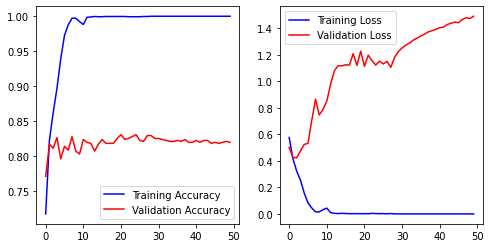

In [46]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [47]:
predictions = classifier.predict(X_val)

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'cr7 100% (cr7)')

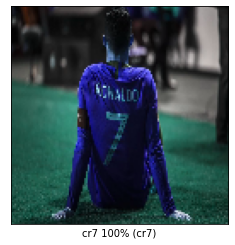

In [49]:
index_image=20
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(X_val[index_image])

predicted_label = "messi" if predictions[index_image]<0.5 else "cr7"
real_label="messi" if Y_val[index_image]==0 else "cr7"
plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                              100*np.max(predictions[index_image]),
                              real_label))

## Transferencia de aprendizaje (usando otras redes entrenadas)

In [50]:
import shutil

In [73]:
# Source path 
source = '/content/LionelMessi/'
# Destination path 
destination = '/content/train'
x=0
for file in os.listdir(path_messi):
  if x<1800:
    shutil.move(f'{source}{file}', destination)
    x += 1
  else:
    break

In [76]:
# Source path 
source = '/content/CristianoRonaldo/'
# Destination path 
destination = '/content/train'
x=0
for file in os.listdir(path_cr7):
  if x<1800:
    shutil.move(f'{source}{file}', destination)
    x += 1
  else:
    break

In [79]:
# Source path 
source = '/content/LionelMessi/'
# Destination path 
destination = '/content/test'
x=0
for file in os.listdir(path_messi):
  shutil.move(f'{source}{file}', destination)

In [84]:
# Source path 
source = '/content/CristianoRonaldo/'
# Destination path 
destination = '/content/test'
x=0
for file in os.listdir(path_cr7):
  shutil.move(f'{source}{file}', destination)

In [85]:
##CREAMOS listas USANDO LA FUNCIÓN glob con los path names de los archivos
import glob
train_it = glob.glob("/content/train/*.jpg")
test_it = glob.glob("/content/test/*.jpg")

In [89]:
len(train_it)

0

In [86]:
len(test_it)

1126

In [64]:
# Source path 
source = '/content/CristianoRonaldo/'
# Destination path 
destination = '/content/train'
for file in os.listdir(path_cr7):
  shutil.move(f'{source}{file}', destination)

In [ ]:
os.listdir('/content/train')

In [19]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [20]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [21]:
##Necesitamos tener las categorias como tipo string
labels = np.array([('messi' if 'messi' in fname else 'cr7') for fname in fnames_train])

In [22]:
df=pd.DataFrame({'images':fnames_train, 'class':labels})
df

,images,class
0,/content/LionelMessi/messi_1459.jpg,messi
1,/content/LionelMessi/messi_1296.jpg,messi
2,/content/LionelMessi/messi_7.jpg,messi
3,/content/LionelMessi/messi_3493.jpg,messi
4,/content/LionelMessi/messi_3911.jpg,messi
...,...,...
3595,/content/CristianoRonaldo/cr7_1031.jpg,cr7
3596,/content/CristianoRonaldo/cr7_3541.jpg,cr7
3597,/content/CristianoRonaldo/cr7_3498.jpg,cr7
3598,/content/CristianoRonaldo/cr7_451.jpg,cr7


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
##Con esta función tenemos otra forma de cargar los datos. Creamos un objeto con los siguientes parametros. Validation Split parte el dataset (25%)
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.20)

In [25]:
##Usamos el método flow_from_dataframe para cargar los datos de entrenamiento. shuffle true va aleatorizar los datos
train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=32,
seed=5,
shuffle=True,
class_mode='binary',
target_size=(224,224))

Found 2880 validated image filenames belonging to 2 classes.


In [26]:
##Usamos el método flow_from_dataframe para cargar los datos de validación. shuffle false para NO aleatorizar los datos
validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=32,
seed=5,
shuffle=False,
class_mode='binary',
target_size=(224,224))

Found 720 validated image filenames belonging to 2 classes.


## Transferencia de aprendizaje (usando otras redes entrenadas)

In [27]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [29]:
base_modelResNet50=ResNet50(pooling='max', weights='imagenet')

In [ ]:
tf.keras.utils.plot_model(base_modelResNet50, show_shapes=True)

In [ ]:
base_modelResNet50.summary()

In [32]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')

In [33]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')
for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [34]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [36]:
epochs=5
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=epochs, verbose=1)

Epoch 1/5
90/90 [==============================] - 575s 6s/step - loss: 0.6581 - accuracy: 0.6375 - val_loss: 0.5518 - val_accuracy: 0.7472
Epoch 2/5
90/90 [==============================] - 576s 6s/step - loss: 0.6541 - accuracy: 0.6462 - val_loss: 0.4251 - val_accuracy: 0.8625
Epoch 3/5
90/90 [==============================] - 581s 6s/step - loss: 0.5694 - accuracy: 0.6979 - val_loss: 0.3220 - val_accuracy: 0.9361
Epoch 4/5
90/90 [==============================] - 580s 6s/step - loss: 0.5945 - accuracy: 0.6806 - val_loss: 0.4863 - val_accuracy: 0.8222
Epoch 5/5
90/90 [==============================] - 580s 6s/step - loss: 0.5546 - accuracy: 0.7035 - val_loss: 0.4508 - val_accuracy: 0.8347


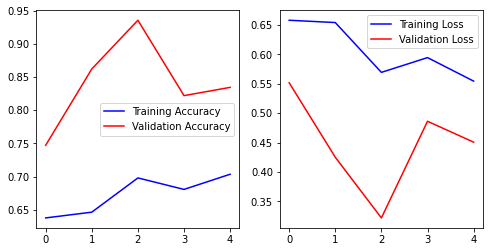

In [37]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [38]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD

In [44]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
##La capa dense recibe vectores, por eso debe tener una capa flatten anterior
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
epochs=10
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=5, verbose=1)

Epoch 1/5
55/90 [=================>............] - ETA: 9:34 - loss: 0.6685 - accuracy: 0.6267

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model = VGG19(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=10, verbose=1)